In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import cv2
import random
import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
driving_log = pd.read_csv('data/driving_log.csv')
driving_log

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


### Data analysis

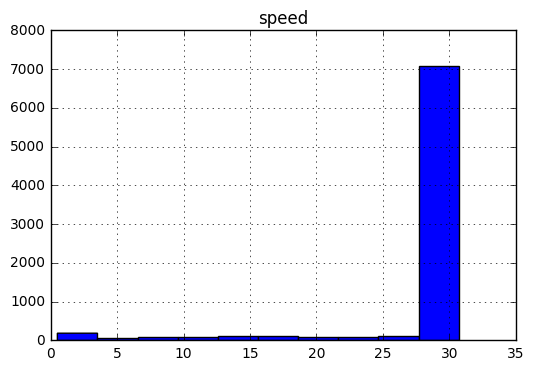

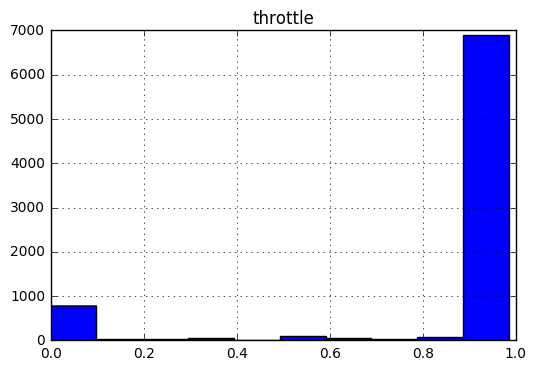

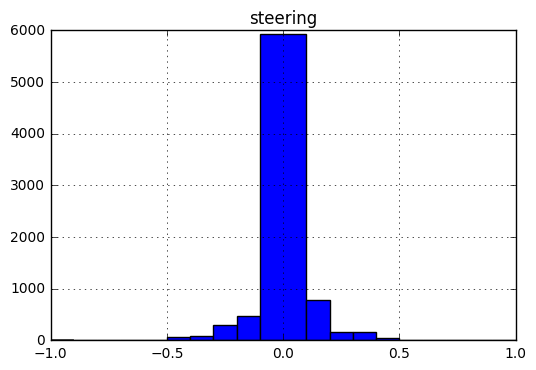

In [3]:
driving_log.hist('speed')
driving_log.hist('throttle')
plt.show()

bins = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, .2,.3,.4,.5,.6,.7,.8,.9,1]
driving_log.hist('steering', bins = bins) #np.histogram(y_train, bins=bins)
plt.show()


### Notes from data analysis:
- Remove the points of the distribution where speed under 20mph since they may be outliers.
- Uneven distribution of steering angles: there are more sharper left turns in the data set. Also, there is a huge peak around 0, which means that the model may have a bias to go straight. If we include the left and right cameras with an steering angle offset, this can fix the problem.

In [4]:
# data cleansing: remove points where speed is too slow
ind = driving_log['speed']>20 
driving_log= driving_log[ind].reset_index()

In [5]:
### Training vs. validation set after shuffling
driving_log = driving_log.sample(frac=1).reset_index(drop=True)
validation_perc = .1
print('Total number of examples:', len(driving_log.index))
train_set, valid_set = train_test_split(driving_log, test_size = validation_perc)
print('Training examples:', len(train_set.index))
print('Validation examples:', len(valid_set.index))

Total number of examples: 7332
Training examples: 6598
Validation examples: 734


### Model definition

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers.advanced_activations import ELU
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(64, 200, 3)))

model.add(Convolution2D(24, 5, 5, border_mode='valid',subsample=(2,2),init="he_normal"))
model.add(ELU())

model.add(Convolution2D(36, 5, 5, border_mode='valid',subsample=(2,2),init="he_normal"))
model.add(ELU())

model.add(Convolution2D(48, 5, 5, border_mode='valid',subsample=(2,2),init="he_normal"))
model.add(ELU())

model.add(Convolution2D(64, 3, 3, border_mode='valid',subsample=(1,1),init="he_normal"))
model.add(ELU())

model.add(Convolution2D(64, 3, 3, border_mode='valid',subsample=(1,1),init="he_normal"))
model.add(ELU())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(100,init="he_normal"))
model.add(ELU())

model.add(Dense(50,init="he_normal"))
model.add(ELU())

model.add(Dense(10,init="he_normal"))
model.add(ELU())

model.add(Dense(1,init="he_normal"))

optimizer = Adam(lr=0.0001)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_squared_error'])

# checkpoint
checkpoint = ModelCheckpoint("model-{epoch:02d}.h5", monitor='loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]


In [7]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 64, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 30, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 30, 98, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 13, 47, 36)    21636       elu_1[0][0]                      
___________________________________________________________________________________________

In [10]:
_ANGLE_CORRECTION_ = .3
_ANGLE_CORRECTION_FOR_TRANSLATION_ = .008

def get_data_from_file(driving_log_record, camera_side):
    img_path = 'data/' + driving_log_record[camera_side][0].strip()
    steering_angle_correction = 0
    if (camera_side == 'left'):
        steering_angle_correction = _ANGLE_CORRECTION_ # move more towards the center i.e. right
    if (camera_side == 'right'):
        steering_angle_correction = -_ANGLE_CORRECTION_ # move more towards the center i.e. left
            
    y = driving_log_record['steering'][0] + steering_angle_correction 
    
    img = mpimg.imread(img_path)
    x = img_to_array(img)
    
    return x, y

In [11]:
def resize_image(img):
    crop_img = img[50:140, :, :] #140/160 so that we don't see the car. 50 so that we don't see the sky (issue if car goes on hill?)
    resized_image = cv2.resize(crop_img, dsize = (200, 64), interpolation =  cv2.INTER_AREA) 
    return resized_image
    
def translate_rdm(img, steering_angle, translate_range_x = 50, translate_range_y = 0):
    rows,cols,_ = img.shape
    translate_pixels_x = random.uniform(-translate_range_x, translate_range_x)
    translate_pixels_y = random.uniform(-translate_range_y, translate_range_y)
    M = np.float32([[1,0,translate_pixels_x],[0,1,translate_pixels_y]])
    trans_img = cv2.warpAffine(img, M, (cols,rows))
    trans_steering_angle = steering_angle + _ANGLE_CORRECTION_FOR_TRANSLATION_ * translate_pixels_x
    
    return trans_img, trans_steering_angle


### Plot an image and its transformations

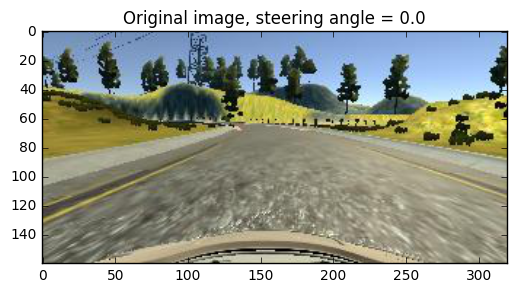

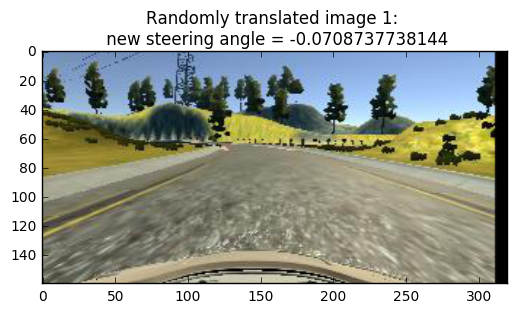

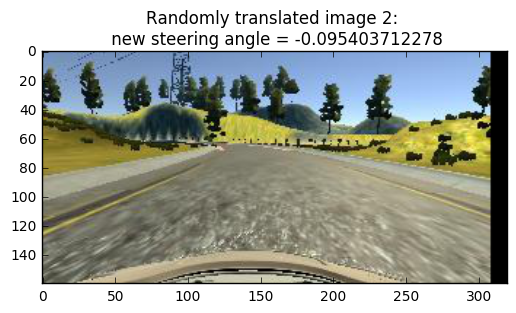

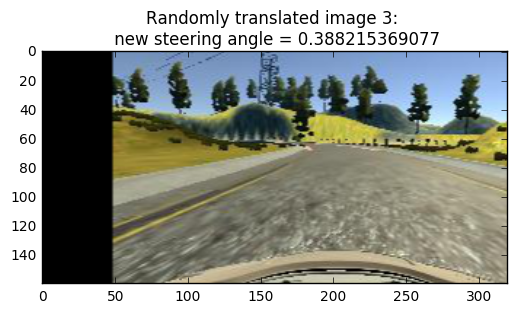

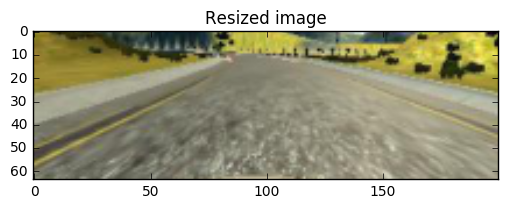

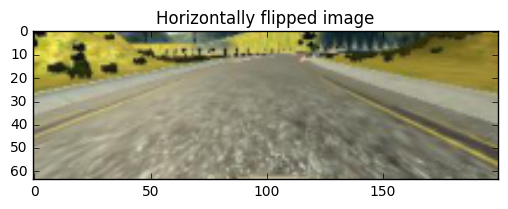

In [21]:
# get random center image
i = np.random.randint(len(driving_log.index))
driving_log_record = driving_log.iloc[[i]].reset_index()
x, y = get_data_from_file(driving_log_record,'center')
xl, yl = get_data_from_file(driving_log_record,'left')
xr, yr = get_data_from_file(driving_log_record,'right')
x = x.astype(np.uint8)
xl = xl.astype(np.uint8)
xr = xr.astype(np.uint8)
plt.imshow(x)
plt.title('Original image, steering angle = ' + str(y))
plt.show()

# example of translation
for it in range(3):
    x1, y1 = translate_rdm(x, y)
    plt.imshow(x1)
    plt.title('Randomly translated image ' + str(it+1) + ': \n new steering angle = '+ str(y1))
    plt.show()

# example of resize
x2 = resize_image(x)
plt.imshow(x2)
plt.title('Resized image')
plt.show()

# example of horizontal flip
xres = cv2.flip(x2,1)
plt.imshow(xres)
plt.title('Horizontally flipped image')
plt.show()



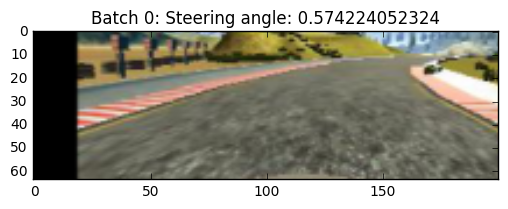

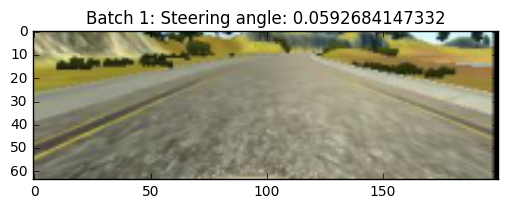

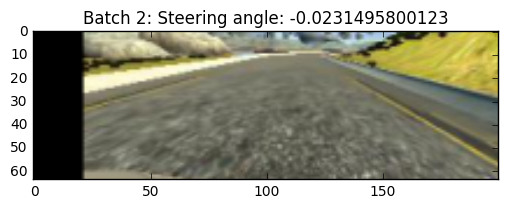

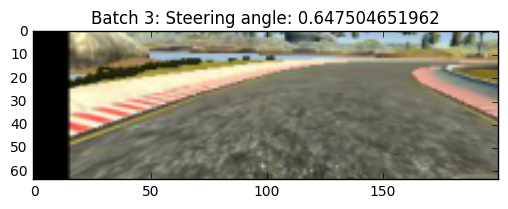

In [11]:
def valid_batch_generator(data, batch_size):
    
    examples_ct = len(data.index)
    batch_ct = int(examples_ct/batch_size)
    
    batch_x = np.zeros((batch_size, 64, 200, 3))
    batch_y = np.zeros(batch_size)
    
    data = data.sample(frac=1).reset_index(drop=True)
    sample_id = 0
    
    while 1:
        for i_batch in range(batch_size):
            
            if sample_id == examples_ct:
                data = data.sample(frac=1).reset_index(drop=True)
                sample_id = 0

            driving_log_record = data.iloc[[sample_id]].reset_index()                
            
            img_side_rdm = np.random.randint(3)
            camera_side = 'center'
            if img_side_rdm == 0:
                camera_side = 'left'
            if img_side_rdm == 2:
                camera_side = 'right'
                
            x,y = get_data_from_file(driving_log_record, camera_side)  

            x = resize_image(x)

            batch_x[i_batch] = x
            batch_y[i_batch] = y
            
            sample_id = sample_id + 1

        yield batch_x, batch_y 

def train_batch_generator(data, batch_size):
    
    examples_ct = len(data.index)
    batch_ct = int(examples_ct/batch_size)
    
    batch_x = np.zeros((batch_size, 64, 200, 3))
    batch_y = np.zeros(batch_size)
    
    data = data.sample(frac=1).reset_index(drop=True)
    sample_id = 0
    
    while 1:
        for i_batch in range(batch_size):
            
            if sample_id == examples_ct:
                # Reshuffling once all the examples have been seen
                data = data.sample(frac=1).reset_index(drop=True)
                sample_id = 0

            driving_log_record = data.iloc[[sample_id]].reset_index()
            
            # pick which camera to load data from
            img_side_rdm = np.random.randint(3)
            camera_side = 'center'
            if img_side_rdm == 0:
                camera_side = 'left'
            if img_side_rdm == 2:
                camera_side = 'right'
            
            # Load data
            x,y = get_data_from_file(driving_log_record, camera_side)
            
            # Random Translation
            x, y = translate_rdm(x, y)

            # Horizontal flip
            horiz_flip = np.random.randint(2)
            if horiz_flip == 0:
                x = cv2.flip(x,1)
                y = -y
            
            # Resize image
            x = resize_image(x)
            
            #######################

            batch_x[i_batch] = x
            batch_y[i_batch] = y
            
            sample_id = sample_id + 1

        yield batch_x, batch_y 
                              
batch_size = 256
train_generator = train_batch_generator(
    train_set,
    batch_size=batch_size)

valid_generator = valid_batch_generator(
    valid_set,
    batch_size=batch_size
)

# Test the training generator by generating 3 random images and their associated image
i = 0
for batch_x, batch_y in train_batch_generator(driving_log, batch_size=1):
    batch_x = batch_x.reshape(64, 200, 3)
    batch_x = batch_x.astype(np.uint8)
    plt.imshow(batch_x)
    plt.title('Batch ' + str(i) + ': Steering angle: ' + str(batch_y[0]))
    plt.show()
    i += 1
    if i > 3:
        break  # otherwise the generator would loop indefinitely


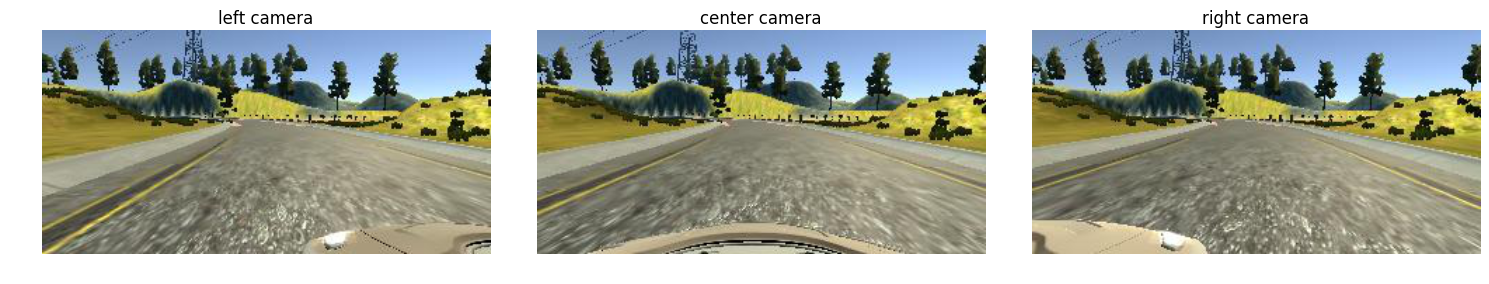

In [26]:
# all 3 images
fig, axes = plt.subplots(1,3,figsize = (15,15))
for i, ax in enumerate(axes.flat):
    xplot = x
    title = 'center camera'
    if i == 0:
        xplot = xl
        title = 'left camera'
    if i == 2:
        xplot = xr   
        title = 'right camera'
    ax.imshow(xplot) 
    ax.axis('off')
    ax.set_title(title)

plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
hist = model.fit_generator(train_generator, validation_data = valid_generator,
                    samples_per_epoch= 28160,  
                    nb_val_samples = 1024,
                    nb_epoch=10, callbacks=callbacks_list) 

hist_history = hist.history
pickle.dump( hist_history, open( "hist_history.p", "wb" ) )

model.save_weights('model.h5')  

Epoch 1/10
28160/28160 [==============================] - 201s - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 2/10
28160/28160 [==============================] - 189s - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 3/10
28160/28160 [==============================] - 187s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 4/10
28160/28160 [==============================] - 187s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5/10
28160/28160 [==============================] - 187s - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 6/10
28160/28160 [==============================] - 187s - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 7/10
28160/28160 [======================

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

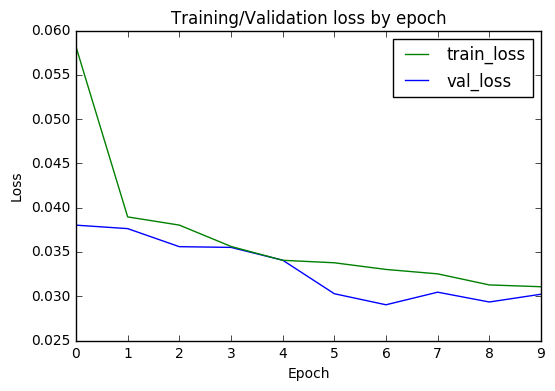

In [12]:
history_loss = pickle.load( open( "hist_history.p", "rb" ) )
ax = plt.subplot(1,1,1)
p1, = ax.plot(history_loss['val_loss'], label="val_loss")
p2, = ax.plot(history_loss['loss'], label="train_loss")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.title("Training/Validation loss by epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Compare steering angles

In [13]:
steering_angles = pickle.load( open( "steering_angle.p", "rb" ) )

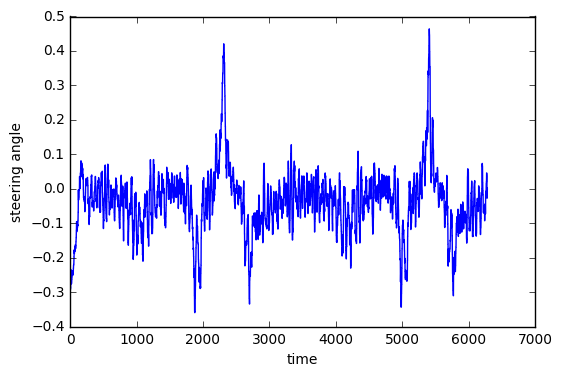

In [14]:
plt.plot(steering_angles)
plt.xlabel('time')
plt.ylabel('steering angle')
plt.show()

### Visualize the weights

In [29]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

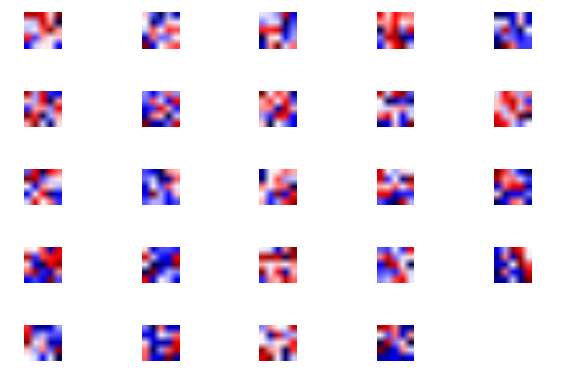

In [49]:
from keras import backend as K

original_w = K.get_value(model.layers[1].W)
weights_layer_1 = np.squeeze(original_w)

wmin = np.min(weights_layer_1)
wmax = np.max(weights_layer_1)

fig, axes = plt.subplots(5,5)

for i, ax in enumerate(axes.flat):
    if i < 24:
        image = weights_layer_1[:,:,:,i].reshape([5,5,3]) 
        image_g = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ax.imshow(image_g, cmap='seismic') #,cmap = 'gray')
        #ax.imshow(image,vmin=wmin, vmax=wmax, cmap='seismic')
        ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

### Visualize the output of the first and second convolution layers

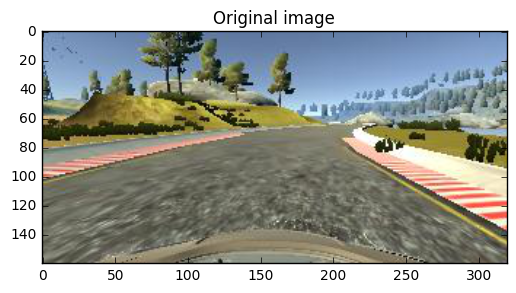

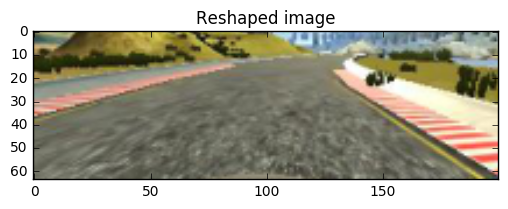

In [35]:
# get random center image
i = np.random.randint(len(driving_log.index))
driving_log_record = driving_log.iloc[[i]].reset_index()
x, y = get_data_from_file(driving_log_record,'center')
x = x.astype(np.uint8)
plt.imshow(x)
plt.title('Original image')
plt.show()

x = resize_image(x)

x = x.astype(np.uint8)
plt.imshow(x, cmap = 'gray')
plt.title('Reshaped image')
plt.show()

x = x.reshape(1, 64, 200, 3)



In [36]:
from keras import backend as K

def get_layer_output(layer_nb):
    return K.function([model.layers[0].input],[model.layers[layer_nb].output])

layer_output = get_layer_output(layer_nb = 1)([x])[0]
layer_2_output = get_layer_output(layer_nb = 3)([x])[0]

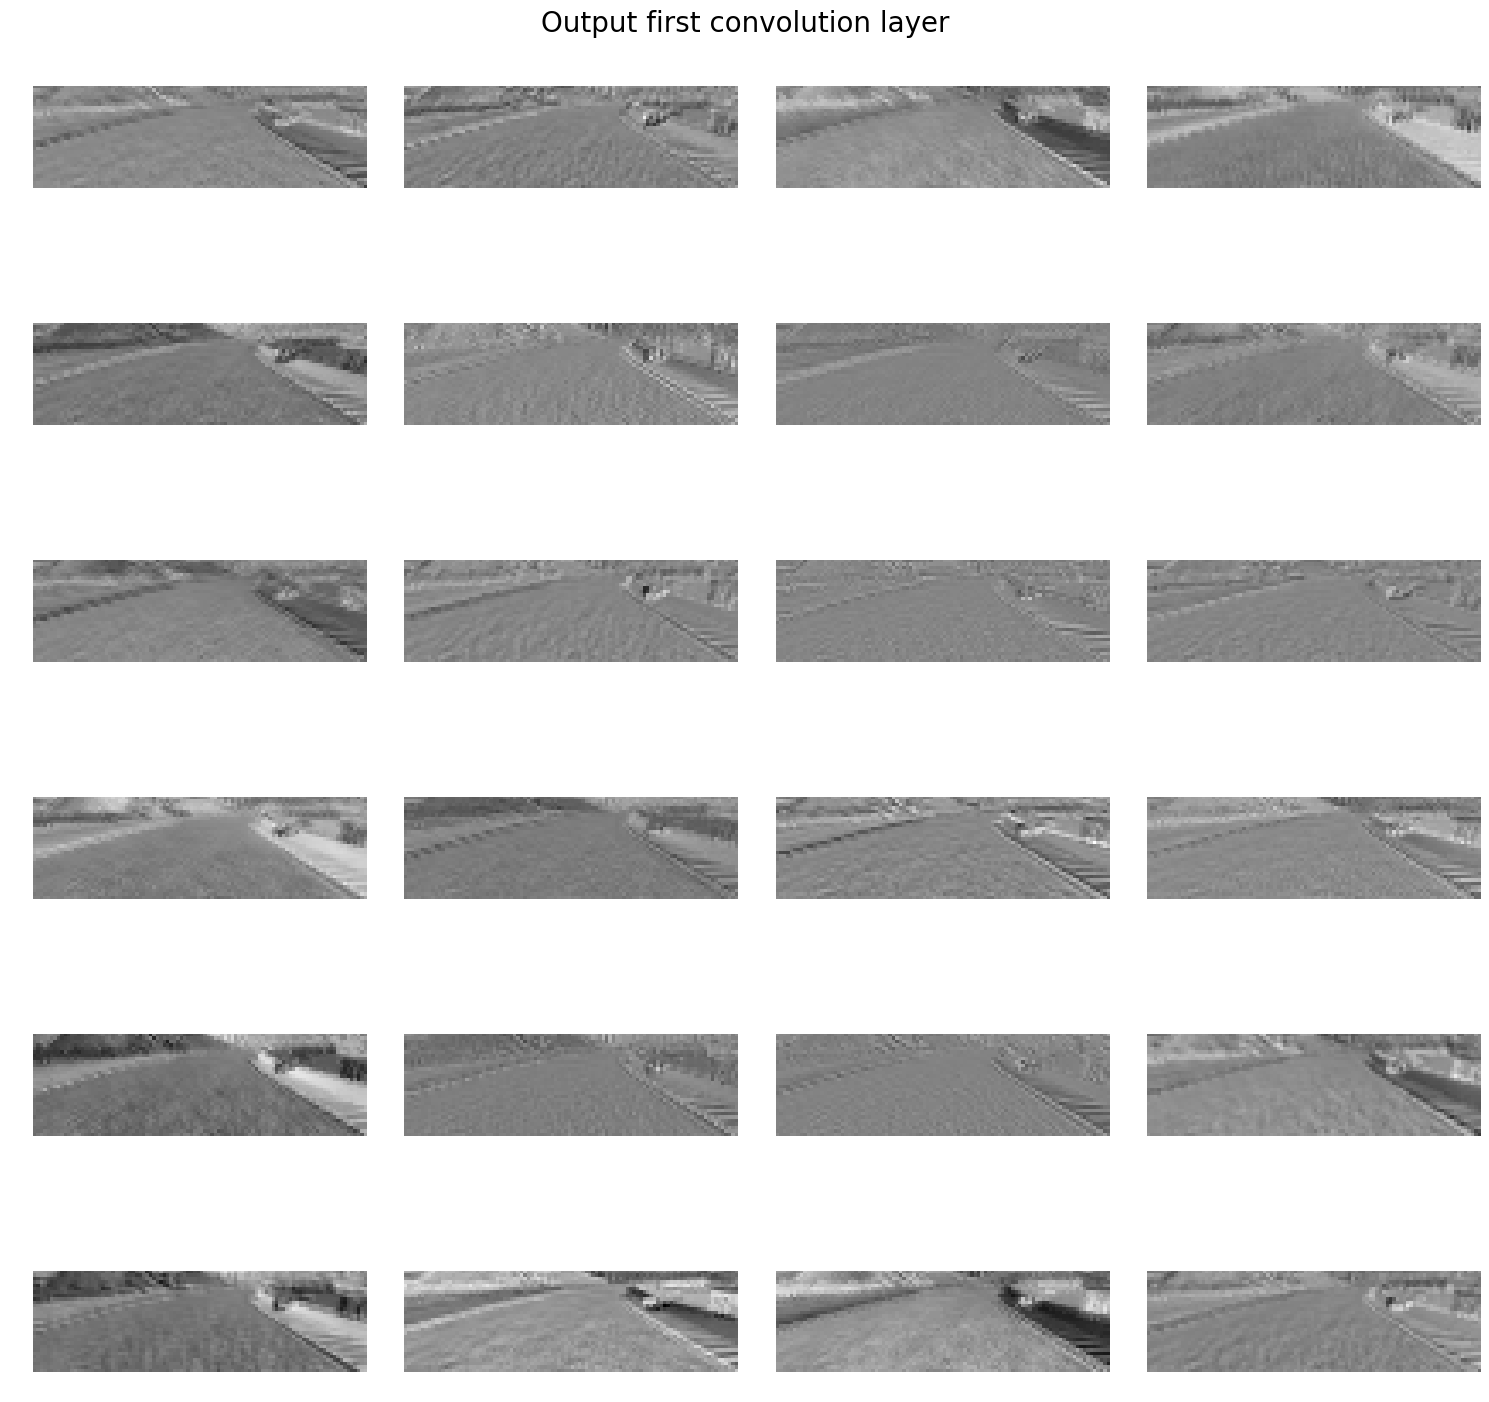

In [46]:
import matplotlib.cm as cm
fig, axes = plt.subplots(6, 4, figsize = (15,15))
vmin = layer_output.min()
vmax = layer_output.max()

for i, ax in enumerate(axes.flat):
    if i < 24:
        image = layer_output[:,:,:,i].reshape([30,98]) 
        ax.imshow(image, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cm.binary)
        ax.axis('off')

fig.suptitle('Output first convolution layer', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()


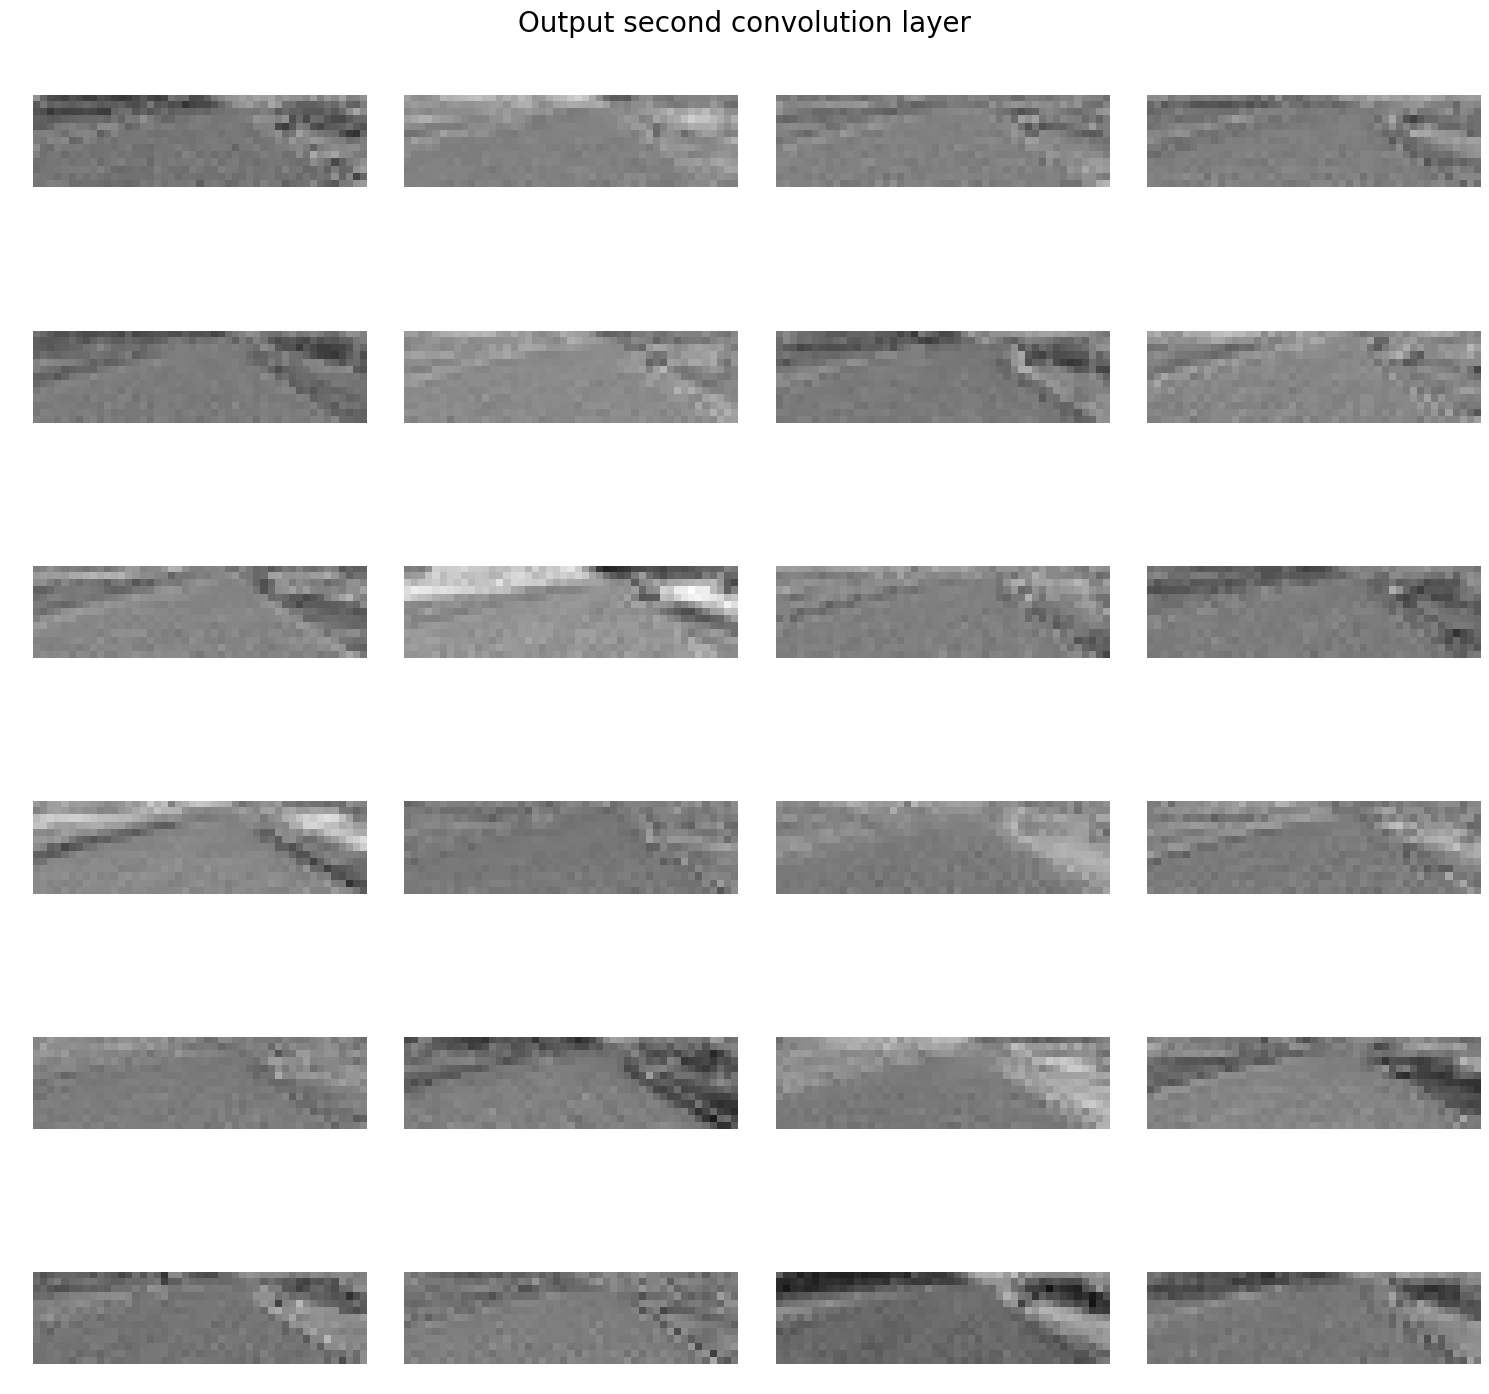

In [45]:
fig, axes = plt.subplots(6, 4, figsize = (15,15))
vmin = layer_2_output.min()
vmax = layer_2_output.max()

for i, ax in enumerate(axes.flat):
    if i < 24:
        image = layer_2_output[:,:,:,i].reshape([13,47]) 
        ax.imshow(image, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cm.binary)
        ax.axis('off')
        
fig.suptitle('Output second convolution layer', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()